# Project : The Movie Database 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview :
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# reading the csv file
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Finding all the Null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
#check number of duplicated rows.
df.duplicated().sum()

1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Some Rows of budget, revenue, runtime seems to have zero, let's find the count and then decide whether to drop those rows or fill them with some value.

In [7]:
#count zero values in budget, revenue and runtime
df_budget_count =  df.groupby('budget').count()['id']
df_revenue_count =  df.groupby('revenue').count()['id']
df_runtime_count =  df.groupby('runtime').count()['id']

In [8]:
# Budget Count
df_budget_count.head(2)

budget
0    5696
1       4
Name: id, dtype: int64

In [9]:
# Revenue Count
df_revenue_count.head(2)

revenue
0    6016
2       2
Name: id, dtype: int64

In [10]:
# Runtime Count
df_runtime_count.head(2)

runtime
0    31
2     5
Name: id, dtype: int64

### Observations:
<ul>
    <li>Budget and Revenue has lot nu ber of rows with 0 as their value dropping them is not a good choice so, I decided to keep them and replace 0 with Null values  </li>
    <li> Duplicated rows should be dropped.</li>
    <li> Drop unnecessary columns homepage, tagline, imdb_id, overview,budget_adj, revenue_adj, keywords.</li>
    <li> Dropping rows with lesser null vaules - cast, director, and genres. </li>
    <li> Drop zero values rows of runtime as it has lesser zero values.</li>
    <li> Certain columns like genres and cast has multiple values seperated by "|", those rows should be seperated. </li>
   
</ul>

### Questions :

#### General Questions:
<ul>    
    <li>Number of movie released year by year</li>
    <li>Popularity Over Years.</li>
    <li>Budget and Movie Trends over the years.</li> 
 </ul>
 
#### Properties associated with popular movies
<ul>
    <li>Average duration, budget, revenue of movies based on popularity ?</li>
    <li>Which director directed most films based on popularity?</li>
    <li>Whcih cast has appeared the most based on popularity?</li>
    <li>Which production companies are more successful based on popularity</li>
    <li>Which genre are more successful based on popularity?</li>
    
</ul>

### Data Cleaning 

In [11]:
# drop columns that are not necessary

col = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj', 'keywords']
df.drop(col, axis=1, inplace=True)

In [12]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [13]:
#Drop the duplicates
df.drop_duplicates(inplace=True)

In [14]:
#drop the null values in cast, director, genres columns
null_values = ['cast', 'director', 'genres']
df.dropna(subset = null_values, how='any', inplace=True)

In [15]:
# see if nulls are dropped.
df.isnull().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
runtime                   0
genres                    0
production_companies    959
release_date              0
vote_count                0
vote_average              0
release_year              0
dtype: int64

In [16]:
#replace zero values with null values in the budget and revenue column.
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
# see if nulls are added in budget and revenue columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [17]:
# filtering runtime rows with zero values
df.query('runtime != 0', inplace=True)
#check
df.query('runtime == 0')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [18]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10703.000000,10703.000000,5.150000e+03,4.843000e+03,10703.000000,10703.000000,10703.000000,10703.000000
mean,64904.988321,0.653818,3.084401e+07,8.933981e+07,102.736896,220.333178,5.966112,2001.235355
std,91161.996308,1.005687,3.893782e+07,1.621546e+08,30.079331,579.481969,0.930155,12.825920
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10538.500000,0.211533,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,20235.000000,0.388036,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,73637.000000,0.722438,4.000000e+07,1.000000e+08,112.000000,149.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


Now we don't have any zero values in budget, revenue and runtime. 

<a id='eda'></a>
## Exploratory Data Analysis
### I General Questions

#### Q1. Number of movie released year by year

In [19]:
movies = df.groupby('release_year').count()['id']
movies.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

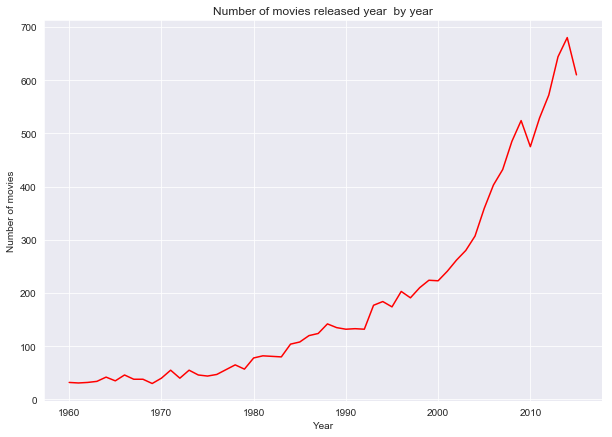

In [20]:
# visualization

sns.set_style('darkgrid')
x = movies.index
y = movies
plt.figure(figsize=(10,7))
plt.plot(x, y, color='red')
plt.title('Number of movies released year  by year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show();

By looking at the above graph we can see that there is a huge increase in the rate of movies year by year.

#### Q2. Popularity Over Years.

In [21]:
populatrity_mean = df.groupby('release_year').mean()['popularity']
populatrity_mean.head()

release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
Name: popularity, dtype: float64

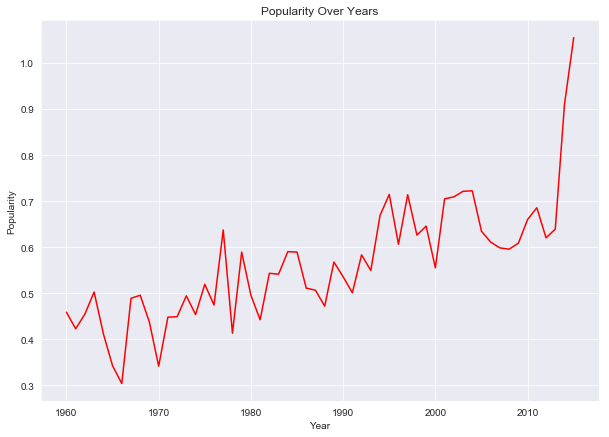

In [22]:
# visualization

sns.set_style('darkgrid')
x = populatrity_mean.index
y = populatrity_mean
plt.figure(figsize=(10,7))
plt.plot(x, y, color='red')
plt.title('Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show();

From the above graph we cans ee that popularity of movies is going upward in recent years.

#### Q3. Budget and Movie Trends over the years

In [23]:
budgets = df.groupby('release_year').mean()['budget']
revenues = df.groupby('release_year').mean()['revenue']

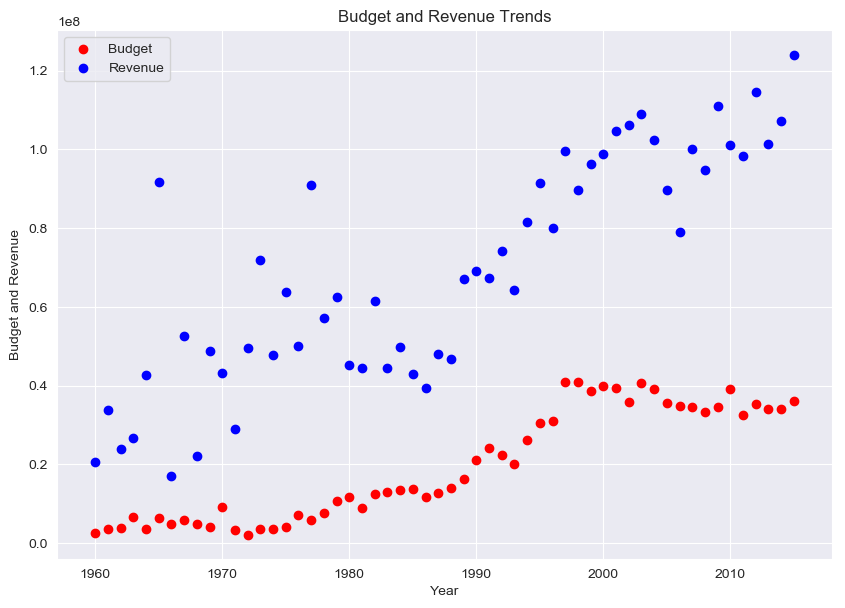

In [24]:
# line graph
sns.set_style('darkgrid')
x1 = budgets.index
y1 = budgets
x2 = revenues.index
y2 = revenues
plt.figure(figsize=(10,7), dpi = 100)
plt.scatter(x1, y1, color='red', label = 'Budget')
plt.scatter(x2, y2, color='blue', label = 'Revenue')
plt.title('Budget and Revenue Trends')
plt.xlabel('Year')
plt.ylabel('Budget and Revenue')
plt.legend(loc = 'upper left')
plt.show();

From the above graph we can see that Budget and Revenue tends to grow year over year, this trend seems to continue.


### II Properties associated with popular movies

To find the average runtime, budget, revenue of movies whose popularity is above average, we neeed to first filter the dataframe

In [25]:
# filtering the df for above average popularity
average_pop =  df['popularity'].mean()
average_pop

0.6538184480052321

In [26]:
# assigning a new dataframe for filtered values
df_popularity = df[df['popularity'] >= average_pop]

#reindexing new dataframe
df_popularity.index = range(len(df_popularity))

df_popularity.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


#### Q4.A.  Average duration of movies based on popularity ?

In [27]:
def avg_fun(column_name):
    return df_popularity[column_name].mean()

In [28]:
# finding the average runtime of movies above average 
avg_fun('runtime')

107.84551769765135

The average runtime movies of above average popularity is 107 minutes.

#### Q4.B. Average budget of movies based on popularity ?

In [29]:
avg_fun('budget')

46649444.30747475

The average budget movies of above average popularity is  over 46 Million Dollars.

#### Q4.C. Average revenue of movies based on popularity ?

In [30]:
avg_fun('revenue')

148141097.7749004

The average revenue movies of above average popularity is  over 148 Million Dollars.

#### Q5. Which director directed most films based on popularity?

In [31]:
# to find the top directors, cast and generes of movie 
#first we need to filter the rows as they are seperated by a "|" symbol and then count them

def filter_row(column_name):
    new_df = df_popularity[column_name].str.cat(sep = '|')
    new_df = pd.Series(new_df.split('|'))
    counts = new_df.value_counts(ascending = False)
    return counts

In [32]:
# top directors
director = filter_row('director')
director.head(10)

Steven Spielberg     22
Clint Eastwood       18
Ridley Scott         16
Tim Burton           16
Ron Howard           15
Martin Scorsese      15
Robert Zemeckis      14
Steven Soderbergh    13
Richard Donner       13
Woody Allen          13
dtype: int64

##### Steven Spielberg is the most popular director with 22 Movies that are most popular
Also other directors taking the stage with him are Clint Eastwood, Ridley Scott, Tim Burton and Ron Howard etc.
Movies directed by these directors tend to be more popular than others But Since we don't really know how many movies the directors directed in total in their lifetime, we can't say for sure that movies directed by above directors will always be this popular but gives us the idea that how much likely it is when it is directed by them.


#### Q6. Whcih cast has appeared the most based on popularity?

In [33]:
#top casts
cast = filter_row('cast')
cast.head(10)

Robert De Niro           44
Samuel L. Jackson        39
Bruce Willis             39
Nicolas Cage             39
Brad Pitt                32
Johnny Depp              32
Tom Cruise               31
Arnold Schwarzenegger    29
Matt Damon               29
Jason Statham            29
dtype: int64

##### Robert De Niro is the most popular director with 44 Movies that are most popular.
Also other cast taking the stage with him are Nicolas Cage, Samuel L. Jackson, Bruce Willis, Brad Pitt etc.
Movies acted by these cast tend to be more popular than others.


As we said for the directors, goes for the actors too as well! Since we don't really know how many movies these actors have acted in total in their lifetime, we can't always be sure that movies acted by these actors will always be popular this much but gives us the idea that how much likely it is when it is acted by them.

#### Q7. Which production companies are more successful based on popularity?

In [34]:
# top Production companies
production_companies = filter_row('production_companies')
production_companies.head(10)

Warner Bros.                              272
Universal Pictures                        248
Paramount Pictures                        197
Twentieth Century Fox Film Corporation    156
Columbia Pictures                         141
Walt Disney Pictures                      130
New Line Cinema                           118
Relativity Media                           87
Metro-Goldwyn-Mayer (MGM)                  80
Touchstone Pictures                        71
dtype: int64

##### Warner Bros. is the most popular production company with 272 Movies that are most popular.
Also other Production Compaines taking the stage with him are Universal Pictures, Paramount Pictures, Twentieth Century Fox Film Corporation etc.
Movies produced by these production comapnies tend to be more popular than others. 

#### Q8. Which genre are more successful based on popularity?

In [35]:
# top generes
genre = filter_row('genres')
genre.head(10)

Drama              1238
Comedy             1083
Thriller            940
Action              883
Adventure           654
Crime               491
Romance             482
Family              452
Science Fiction     449
Fantasy             385
dtype: int64

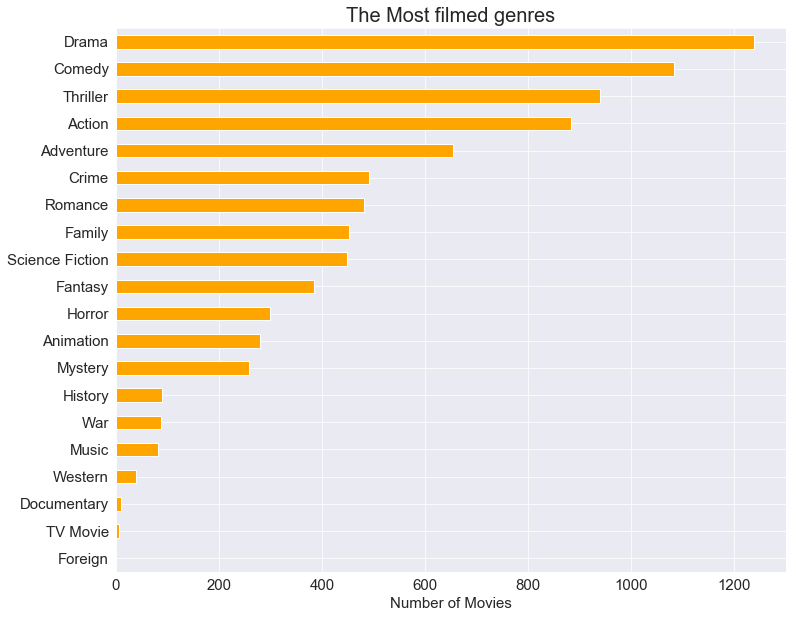

In [36]:
# visualization 
sns.set_style('darkgrid')

genre.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genre.plot.barh(color = 'orange', fontsize = 15)
ax.set_title('The Most filmed genres',size =20)
ax.set_xlabel('Number of Movies', fontsize = 15)
ax.figure.set_size_inches(12, 10)
plt.show()


####  Drama is the most popular Genre with over 1200+ Movies that are most popular.
Comedy, Thriller, Action etc. takes the next position with over 800+ movies.
Looks like Western, Documentary, TV Movie and Foreign Generes are the least popular with less than 100 Movies.


<a id='conclusions'></a>
## Conclusions

The Investigation shows us that -
1. There is a huge increase in the rate of movies year by year.
2. The popularity of movies is going upward in recent years.
3. The Budget and Revenue tends to grow year over year, this trend seems to continue.

Properties asscoicated with popular movies are : 
1. Average Runtime = 107 minutes.
2. Average Budget = 46 Million Dollars.
3. Average Revenue  = 148 Million Dollars.
4. Cast associated with high popularity movies are Robert De Niro and Nicolas Cage;
5. Director associated with high popularity movies are Steven Spielberg and Clint Eastwood;
6. Genres associated with high popularity movies are drama, comedy, and thriller;
7. Production Companies associated with high popularity movies are Warner Bros., Universal Pictures and Paramount Pictures.



## Limitations

1. Data Quality - Most of the values are 0 in budget, revenue and runtime column, I would assume that they are missing.
2. Units in Budget and Revenue column is undefined, it might be possible different movies different currency according to the country they are produce in.
3. Characterising movies based on popularity is just one factor that is taken into account.
4. The metrics of Popularity and vote counts data is undefined. 